In [25]:
# Importing useful libraries

import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import datetime
import plotly.express as px
import seaborn as sns


## [RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.



* Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?


We start by importing the useful columns of the 2 datasets to work properly on it and to store less memory.

In [3]:
# Importing the first dataset "author" in a dataframe called df_5_a to work on it

file_path_authors = "./lighter_authors.json"
ch_size = 100
dfs = []

chunks = pd.read_json(file_path_authors, lines = True, chunksize=1000)

# Read columns' names
for chunk in chunks:
    chunk.info()
    break

with open(file_path_authors, "r") as file:
    for ch in pd.read_json(file, lines = True, chunksize = 1000):
        dfs.append(ch)

df_5_a = pd.concat(dfs, ignore_index = True)

df_5_a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ratings_count       1000 non-null   int64  
 1   average_rating      1000 non-null   float64
 2   text_reviews_count  1000 non-null   int64  
 3   work_ids            1000 non-null   object 
 4   book_ids            1000 non-null   object 
 5   works_count         1000 non-null   int64  
 6   id                  1000 non-null   int64  
 7   name                1000 non-null   object 
 8   gender              1000 non-null   object 
 9   image_url           1000 non-null   object 
 10  about               1000 non-null   object 
 11  fans_count          1000 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179
...,...,...,...,...,...,...,...,...,...,...,...,...
351762,19,4.26,3,"[79663810, 56338563, 65881656]","[53075671, 35051340, 42264980]",3,16777034,Lyon Gamer,male,https://images.gr-assets.com/authors/149373532...,Lyon Gamer<br />nickname sotto cui si nasconde...,0
351763,11,3.36,2,[42091916],[22604300],1,16777055,Brian Hatch,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Brian was born, he lived a little, and he has ...",0
351764,23,3.78,5,"[61906297, 61366902, 45107362]","[40246014, 39710679, 25363358]",3,16777067,Nicholas Baer,male,https://s.gr-assets.com/assets/nophoto/user/m_...,Nicholas Baer is Visiting Assistant Professor ...,1
351765,0,0.00,0,[50301486],[29919838],1,16777091,James Ketron Ross,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"James Ross was a physician, winemaker, artist,...",0


In [20]:
chunks = pd.read_json("./lighter_books.json", lines = True, chunksize=1000)

good_columns  = []  # list with the columns' names

for chunk in chunks:
    good_columns  = chunk.columns.tolist()
    break

# print(good_columns)

# Importing only the interesting columns from the dataset "books" to solve the exercise

file_path_books = "./lighter_books.json"
ch_size = 10000
dfs = []

with open(file_path_books, "r") as file:
    for ch in pd.read_json(file, lines = True, chunksize = 1000):
        ch = ch[["id", "title", "author_id", "author_name", "series_name", "series_id", "series_position", "format", "original_publication_date", "work_id", "average_rating", "text_reviews_count"]]  # selecting only the useful columns
        dfs.append(ch)

df_5_b = pd.concat(dfs, ignore_index = True)

Plotting the 10 most influential authors regarding their fan_count. We use the dataset "df_5_a".

In [5]:
df_sorted_fc = df_5_a.sort_values(by=df_5_a.columns[11], ascending = False)

fc_columns = df_sorted_fc.iloc[:, [6, 7, 11]]

print(fc_columns.head(10)) # to print only the first 10.

most_influent_authors = dict()
count = 0

for i, j in zip(fc_columns["name"], fc_columns["id"]):
    most_influent_authors[i] = j
    count += 1
    if count == 10:
        break

most_influent_authors

             id                 name  fans_count
1017       3389         Stephen King      766035
169374  4039811        Veronica Roth      455358
6397      23470          Bill  Gates      446876
205870  5430144       Colleen Hoover      356633
4537      15872         Rick Riordan      339346
1161       3780      James Patterson      317040
100166  1406384           John Green      282537
3818      12855  Neil deGrasse Tyson      277850
27110    150038      Cassandra Clare      238560
32358    194416         Mindy Kaling      234647


{'Stephen King': 3389,
 'Veronica Roth': 4039811,
 'Bill  Gates': 23470,
 'Colleen Hoover': 5430144,
 'Rick Riordan': 15872,
 'James Patterson': 3780,
 'John Green': 1406384,
 'Neil deGrasse Tyson': 12855,
 'Cassandra Clare': 150038,
 'Mindy Kaling': 194416}

Plotting the first 10 authors sorted by works_count.

To do this we first check, with the code below, that all the books are different. This because, for example, we noticed that there are various different publications of the same book (e.g. different languages, different format and so on). So this new datasets is clean from all the double recurrences of the same book.

In [6]:
df_5_b_2 = df_5_b.drop_duplicates(subset=['title', 'author_id', 'series_id'], keep = "first")
df_5_b_2 = df_5_b_2.drop_duplicates(subset = ['work_id'])


Let's work on cleaning up the dataset with respect to the publication date, as it contains various date formats that need to be standardized for a better analysis.




In [7]:
# Work on the data_frame to fix the variable publication_date and create a new column formatted as "%Y-%m-%d"

opd_column = df_5_b_2["original_publication_date"]
opd_column_formatted = []

for i in opd_column:
    if len(i) in [4, 7, 10]:
        if len(i) == 4:
            i += "-01-01"

        if len(i) == 7:
            i += "-01"
        try:
            format = "%Y-%m-%d"
            timestamp_formattato = datetime.datetime.strptime(i, format)
            opd_column_formatted.append(timestamp_formattato)
        except ValueError as ve:
            opd_column_formatted.append(pd.NaT)
    else:
        opd_column_formatted.append(pd.NaT)

df_5_b_2['opd_column_formatted'] = opd_column_formatted

Let's also clean 'original_publication_date' column deleting outliers.

We have chosen to remove outliers using the 1st percentile as the lower limit and today's date as the upper limit. However, there are different ways to implement this procedure.

In [8]:
df_5_b_2['opd_column_formatted'] = pd.to_datetime(df_5_b_2['opd_column_formatted'], errors='coerce')

Q_01 = df_5_b_2['opd_column_formatted'].quantile(0.01)

# Calculate the limits for outliers
lower_limit = pd.to_datetime(Q_01)
upper_limit = pd.to_datetime("2023-11-02 00:00:00")

# Filter the DataFrame to remove outliers
df_5_b_2 = df_5_b_2[(df_5_b_2['opd_column_formatted'] >= lower_limit) & (df_5_b_2['opd_column_formatted'] <= upper_limit)]

In [9]:
# Count unique works_id for every author_id
count_work_id = df_5_b_2.groupby('author_id')['work_id'].nunique()

# Get the result as dataframe
result_df = count_work_id.reset_index()

# Rename columns
result_df.columns = ['author_id', 'num_works']

result_df = result_df.merge(df_5_b_2[['author_id', 'author_name']].drop_duplicates(), on='author_id', how='left')

result_df_books = result_df.sort_values(by='num_works', ascending=False)

result_df_books.head(10)

,author_id,num_works,author_name
156167,5823409,88499,Jesse Russell
141979,5153555,45071,Source Wikipedia
71622,1000834,30040,NOT A BOOK
142103,5158478,28335,Anonymous
2590,8777,26988,Philip M. Parker
149935,5481957,24940,Various
132102,4699102,21647,Unknown
123836,4340042,16715,Books LLC
116325,3510823,4693,Walt Disney Company
24047,136264,4276,Organisation for Economic Co-operation and Dev...


This table above represents the first 10 "authors", sorted by their publications. As expected they are pretty much all companies or classes such as 'NOT A BOOK' or 'UNKNOWN'. 

But we can visualize the table without these elements with the code below.

In [10]:
x = ['NOT A BOOK', 'Unknown', 'Various', 'Anonymous']
result_df_books = result_df_books.loc[~result_df_books['author_name'].isin(x)]
result_df_books.head(10)

,author_id,num_works,author_name
156167,5823409,88499,Jesse Russell
141979,5153555,45071,Source Wikipedia
2590,8777,26988,Philip M. Parker
123836,4340042,16715,Books LLC
116325,3510823,4693,Walt Disney Company
24047,136264,4276,Organisation for Economic Co-operation and Dev...
142317,5167894,3600,Hephaestus Books
121163,4156059,3364,Livres Groupe
60,119,2968,McDougal Littell
41452,323872,2800,McGraw-Hill Education


In [11]:
result_df_5 = []
result_df = result_df[result_df['author_id'].isin(most_influent_authors.values())]
result_df

for key, value in most_influent_authors.items():
    result_df_5.append([key, value, result_df[result_df['author_id'] == value]['num_works'].iloc[0], df_5_a[df_5_a['id'] == value]['fans_count'].iloc[0]])

result_df_5 = pd.DataFrame(result_df_5)
result_df_5.columns = ['author_name', 'author_id', 'number_of_books', 'fans_count']
result_df_5

,author_name,author_id,number_of_books,fans_count
0,Stephen King,3389,375,766035
1,Veronica Roth,4039811,19,455358
2,Bill Gates,23470,2,446876
3,Colleen Hoover,5430144,18,356633
4,Rick Riordan,15872,66,339346
5,James Patterson,3780,247,317040
6,John Green,1406384,15,282537
7,Neil deGrasse Tyson,12855,10,277850
8,Cassandra Clare,150038,73,238560
9,Mindy Kaling,194416,3,234647


The most influent author is Stephen King with 776035 fans and 375 books published. 

It's not surprising that he has so many fans, considering he's the author with the most books published among the top 10 influential authors.

* Have they published any series of books? If any, extract the longest series name among these authors.



In [12]:
list_series = []

for i in most_influent_authors:
    selected_row = df_5_b_2.loc[df_5_b_2['author_id'] == most_influent_authors[i]]
    variable_value = selected_row['series_name'].values
    variable_value = list(set(variable_value))
    variable_value.remove('')
        
    if variable_value == []:
        print(f"The author {i} hasn't written any series.")
        print()
    else:
        count = 1
        print(f"The author {i} has written the next series: ")
        for j in variable_value:
            print(f"{count}. {j}")
            count += 1
            list_series.append(j)
        print()

The author Stephen King has written the next series: 
1. Danse macabre
2. The Shining Split-Volume
3. The Dark Tower
4. The Secretary of Dreams
5. Under the Dome Split-Volume
6. Nightmares & Dreamscapes
7. Skeleton Crew
8. The Shining
9. 暗黒の塔
10. The Stand (split volumes)
11. Pesadillas y alucinaciones
12. Insomnia Split-Volume
13. Dreamcatcher Split-Volume
14. It (2 volumes)
15. Everything's Eventual [Japanese]
16. The Dark Tower: Graphic Novels
17. アンダー・ザ・ドーム
18. It (3 volumes)
19. Bazaar
20. Les Tommyknockers
21. Duma Key Split-Volume
22. Bill Hodges Trilogy
23. The Best American Short Stories
24. The Stand: Graphic Novels
25. Different Seasons
26. ドリームキャッチャー
27. The Stand (3 volumes)
28. The Green Mile
29. The Talisman

The author Veronica Roth has written the next series: 
1. Divergent
2. Divergent Japanese Split-Volume Edition

The author Bill  Gates hasn't written any series.

The author Colleen Hoover has written the next series: 
1. Slammed
2. Never Never
3. Maybe
4. Hopeless


Bill Gates and Mindy Kaling have not authored any series. The other authors have written numerous series, many of which have been translated into multiple languages and published under different titles in various locations. For instance, Stephen King, an American author, is highly popular in Japan, and as a result, some of his series are also available there, as indicated by the previous code's output.

Now, let's extract the longest series name among those found earlier.

In [13]:
longest_string = ""

for string in list_series:
    if len(string) > len(longest_string):
        longest_string = string

sorted_list = sorted(list_series, key=len)
print(longest_string)

Percy Jackson and the Olympians: The Graphic Novels


In [14]:
###### SERIES_POSITION CHECKKK #########

The longest series name is: Percy Jackson and the Olympians: The Graphic Novels

* How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.


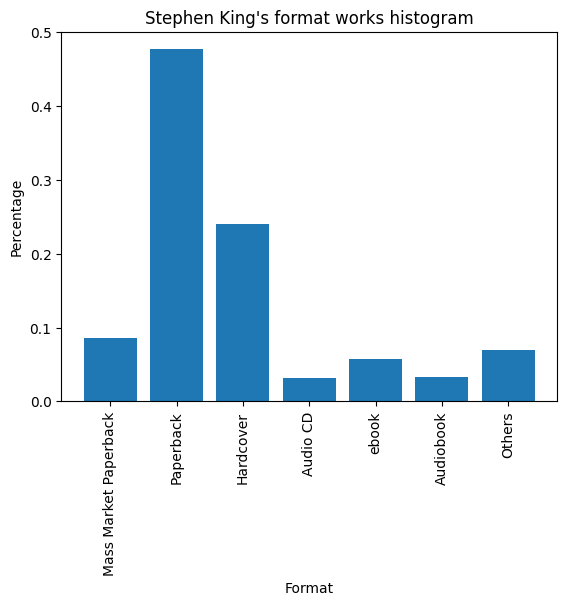

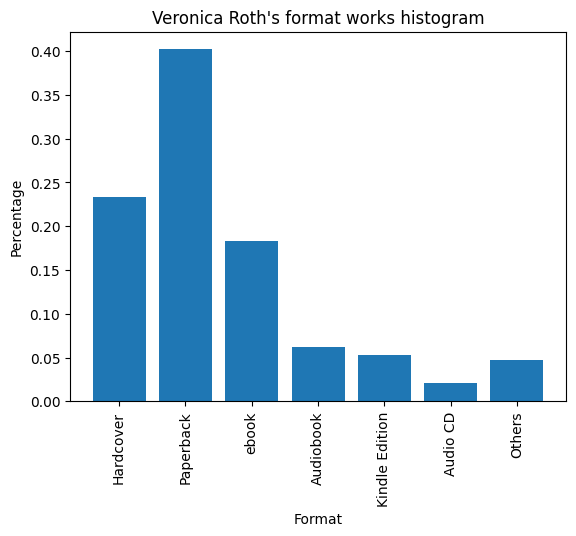

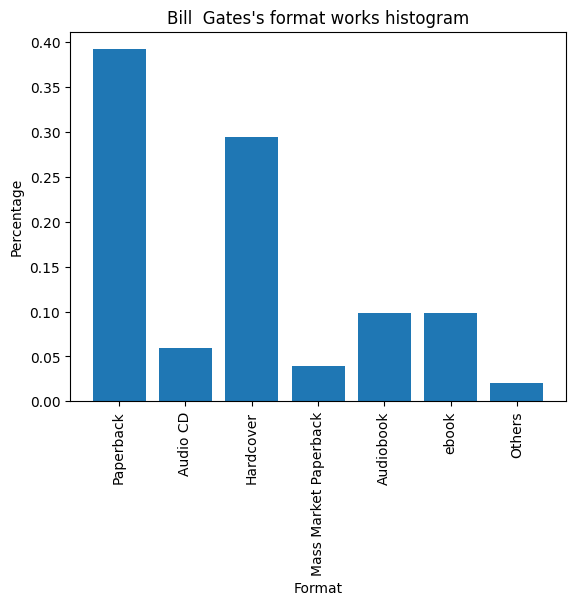

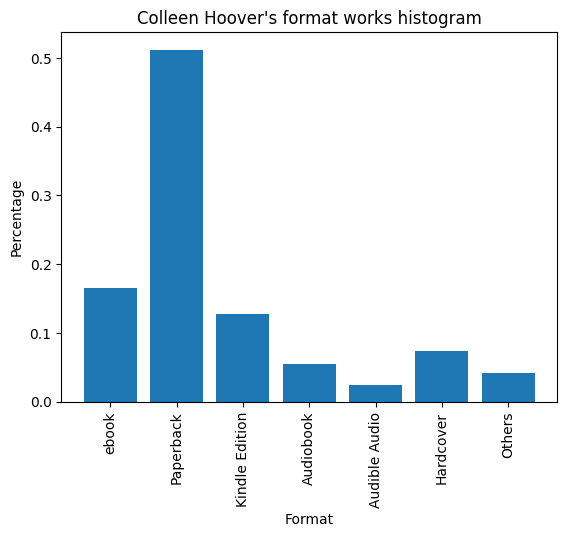

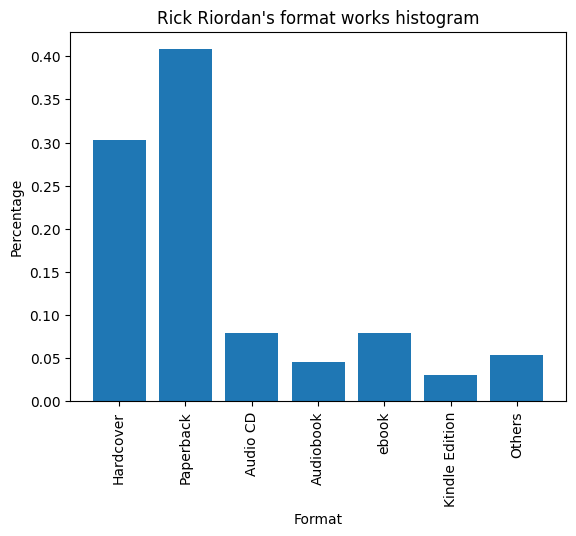

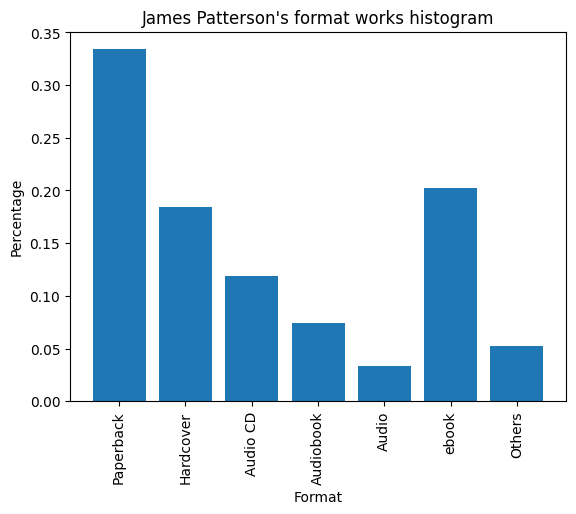

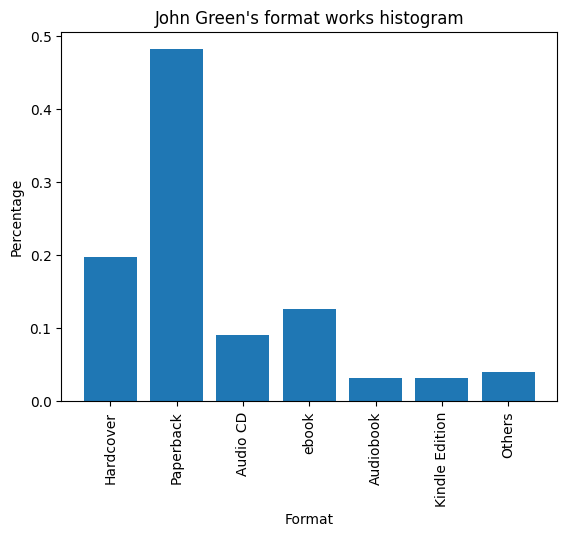

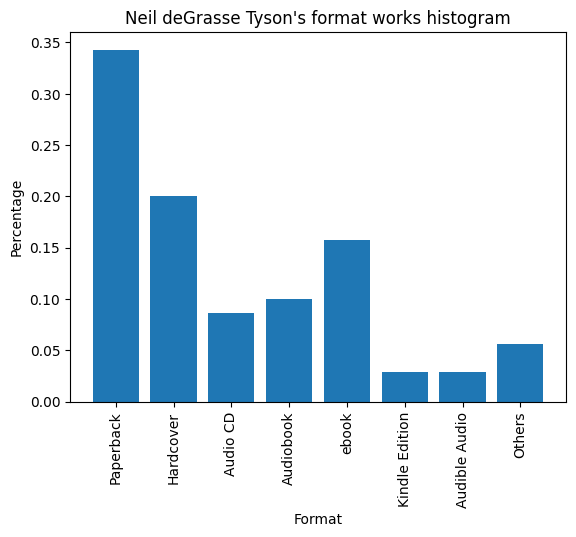

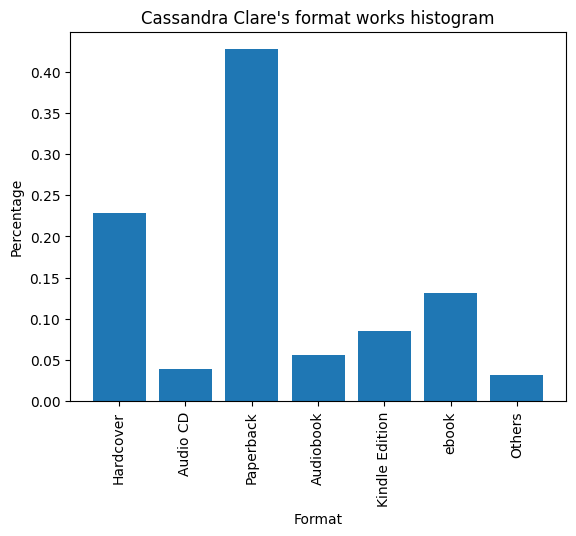

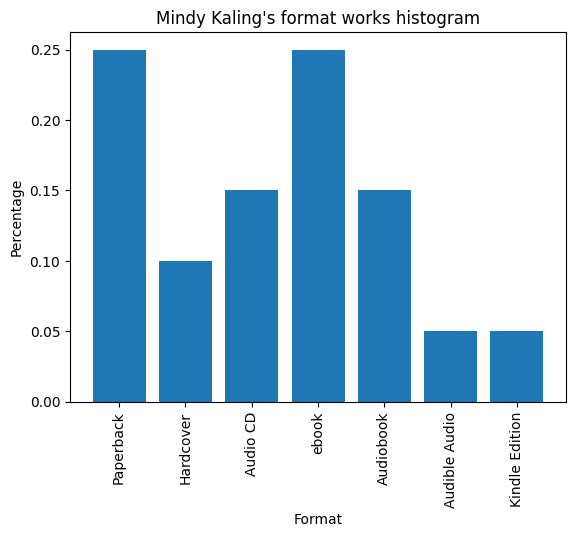

In [15]:
# To answer this question we use the original database and not "df_5_b_2" because we need to evaluate all kinds of formats published by an author,
# even if there are more formats for the same opera.

for i in most_influent_authors:
    sel_row = df_5_b.loc[df_5_b['author_id'] == most_influent_authors[i]]
    value_var = sel_row['format'].values
    app = Counter(value_var)
    del app['']
    count = 0
    new_dict = {}
    
    total = sum(app.values())
    
    for key in app:
        if app[key]/total < 0.02:
            count += np.round(app[key]/total, 3)
        else:
            new_dict[key] = np.round(app[key]/total, 3)
    
    if count != 0:
        new_dict['Others'] = count

    # print(f"{i} ha: {new_dict}")

    cat = new_dict.keys()  
    val = new_dict.values()   
    plt.bar(cat, val)

    # add labels
    plt.xlabel("Format")
    plt.ylabel("Percentage")
    plt.title(f"{i}'s format works histogram")
    plt.xticks(rotation = 90)
    
    # show the plot
    plt.show()

These graphs display the distributions of book formats for each of the most influential authors. To streamline the presentation, we have categorized all formats that represent less than 2% into a class labeled 'Others' to prevent an excessive number of different formats.


We can observe that the most prevalent formats are Paperback and Hardcover, followed by eBooks and Audiobooks. This highlights how paper has not yet been completely overtaken by digital formats and how people still appreciate purchasing books as they used to.

We can also notice that more recent authors tend to use digital publications, unlike older authors. Furthermore authors that has more series use more different formats.

* Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias”. You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.

In [48]:
df_authors_10 = df_5_a[df_5_a['id'].isin(most_influent_authors.values())]

df_authors_10 = df_authors_10[df_authors_10['gender'] != ""]

## df_authors_10 = df_5_a[df_5_a['gender'].isin(['male', 'female'])]

grouped = df_authors_10.groupby('gender')

# Calculate mean, median, and standard deviation for each group
summary_stats = grouped.agg({
    'fans_count': ['mean', 'median', 'std'],
    'average_rating': ['mean', 'median', 'std'],
    'text_reviews_count': ['mean', 'median', 'std']
})

# Rename the columns for clarity
summary_stats.columns = ['fans_mean', 'fans_median', 'fans_sd',
                         'rating_mean', 'rating_median', 'rating_sd',
                         'reviews_mean', 'reviews_median', 'reviews_sd']

# Reset the index to make 'gender' a regular column
summary_stats.reset_index(inplace=True)

# Display the summary statistics
summary_stats
# df_authors_10

,gender,fans_mean,fans_median,fans_sd,rating_mean,rating_median,rating_sd,reviews_mean,reviews_median,reviews_sd
0,female,350183.666667,356633.0,108542.796289,4.176667,4.24,0.109697,311170.666667,277033.0,92774.129585
1,male,474140.333333,339346.0,253034.111792,4.113333,4.04,0.181475,432107.000000,354145.0,153512.672138


## [RQ6] For this question, consider the top 10 authors concerning the number of fans again.

* Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?


To answer this question, we need to clean the 'series_position' column first. This is because some series have a sort of spin-off that contains more than one volume, and there are also some kinds of books that are not part of the main saga.

In [ ]:
ids = list(most_influent_authors.values())

# Filter the original dataframe based on the ID's 
df_initial = df_5_b_2[df_5_b_2['author_id'].isin(ids)] 

Only considering books that are part of a series.

In [ ]:
df_series = df_initial.dropna(subset=['opd_column_formatted', 'series_id', 'series_position']) # dropping all the books that are not part of a series
df_series = df_series[df_series['series_id'] != ""]
df_series = df_series[df_series['series_position'] != ""]
len(df_series) # 368 books not belonging to a series

368

In [ ]:
df_series = df_series.sort_values(by=['series_id', 'series_position'])

df_series['time_gap'] = df_series.groupby('series_id')['opd_column_formatted'].diff()

In [ ]:
df_series['time_gap'] = df_series['time_gap'].astype(str) 
df_series['time_gap'] = df_series['time_gap'].replace('0:00:00', np.nan) # we are not considering time gaps equal to 0
df_series['time_gap'] = pd.to_timedelta(df_series['time_gap'])

media_timegap_series = df_series['time_gap'].mean()
print(f"Time gap between 2 consecutive publications of books belonging to a series is: {media_timegap_series.days} days")

Time gap between 2 consecutive publications of books belonging to a series is: 340 days


We found out the average time gap between two subsequent publications for a series of books is equal to **340 days**, equal to 1 year more or less.

Before delving into the solution of the other average time between two books not belonging to a series, it's important to an assumption.

We expect that there will be a shorter time gap between the consecutive publications of books within a series. This expectation is based on the likelihood that an author often works on multiple books within the same series simultaneously or begins working on the next one almost immediately after releasing the most recent installment. This is in contrast to two books that are not part of the same series, where we might expect longer intervals between their publications.

So let's create a new subset to analyze the time gap between two books not belonging to a series.


In [ ]:
df_not_series = df_initial.drop(columns = ['series_position', 'original_publication_date']) # we work again on the original dataset because we need also the NA's series_id
df_not_series = df_not_series[df_not_series['series_id'] == ""]
df_not_series = df_not_series.sort_values(by=['author_id', 'opd_column_formatted'])

print(len(df_not_series)) # 447 books within a series

447


In [ ]:
time_gap_books = df_not_series.groupby('author_id')['opd_column_formatted'].diff()
df_not_series['time_gap_books'] = time_gap_books
df_not_series['time_gap_books'] = df_not_series['time_gap_books'].replace(datetime.timedelta(0), pd.NaT) # we are not considering timedelta(0)
df_not_series['time_gap_books'] = df_not_series['time_gap_books'].replace(np.nan, pd.NaT)


In [ ]:
# Let's finally compute the mean

a = datetime.timedelta(0)
conta = 0

for i in df_not_series['time_gap_books']:
    if str(type(i)) != "<class 'pandas._libs.tslibs.nattype.NaTType'>":
        a += i
        conta += 1

print(f"Time gap between 2 consecutive publications of books not belonging to a series is {(a/conta).days} days")

Time gap between 2 consecutive publications of books not belonging to a series is 204 days


Unexpected, the time gap between the release of two consecutive books, which are not part of a series, is **204 days**. Notably, this 204-day gap is approximately two-thirds of the time gap calculated for some other context.

############# COMMENTSSS #######

* For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?


In [ ]:
# Let's start by creating a new column of the subset with the year of the original publication of every book

df_6 = df_5_b_2[["author_id", "original_publication_date", "work_id"]]

df_6 = df_6[df_6['author_id'].isin(ids)]

opd_column = df_6["original_publication_date"]
year_of_publication = []

for i in opd_column:
    if len(i) in [4, 7, 10]:
        if len(i) == 4:
            i += "-01-01"

        if len(i) == 7:
            i += "-01"
        
        format = "%Y-%m-%d"
        timestamp_format = datetime.datetime.strptime(i, format)
        year_of_publication.append(timestamp_format.year)
    else:
        year_of_publication.append(pd.NaT)

df_6['opd_column_formatted'] = year_of_publication
df_6 = df_6.dropna(subset=['opd_column_formatted'])
df_6

,author_id,original_publication_date,work_id,opd_column_formatted
3114,3389,2003-11-04,2754911,2003
3178,3389,2004-09-21,6309701,2004
3179,3389,2002,6309704,2002
3180,3389,2004-06-08,1178083,2004
3181,3389,1987-05,2113248,1987
...,...,...,...,...
6982182,5430144,2015-04-28,45155963,2015
6987678,3389,1989-08-01,45175106,1989
6991456,4039811,2014-06-25,45187402,2014
6991641,4039811,2014-06-25,45188175,2014


######## COMMENTS #########

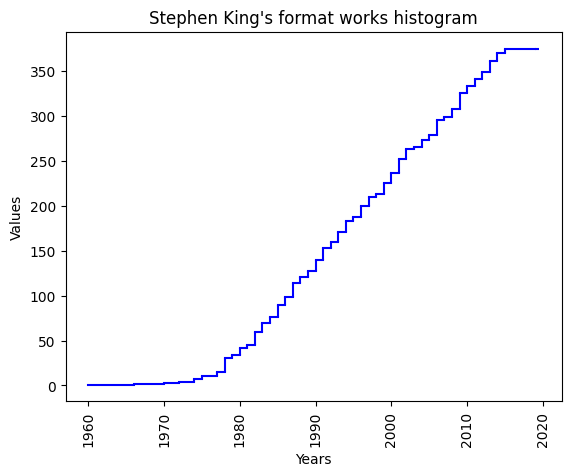

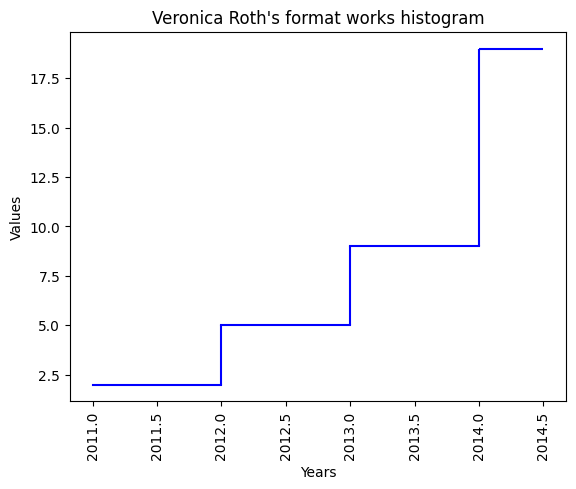

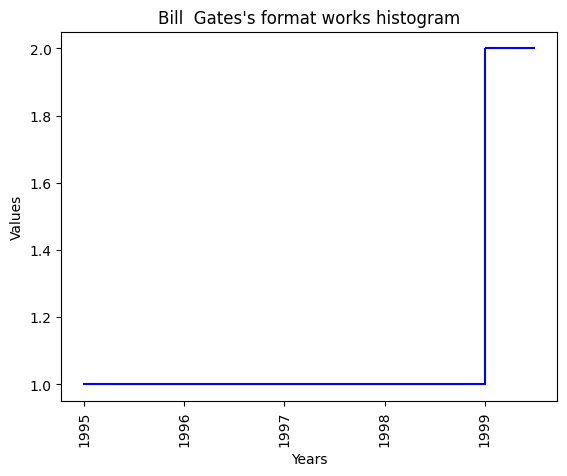

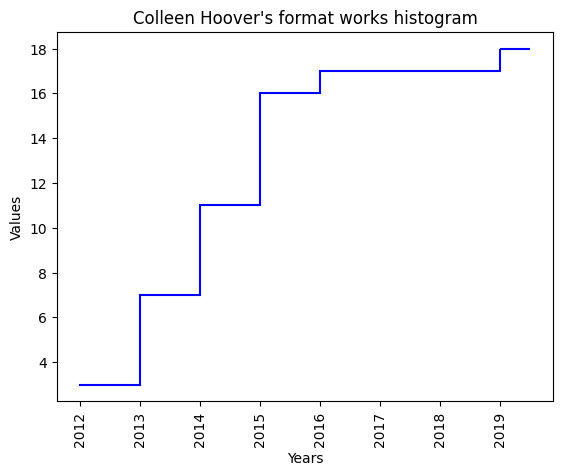

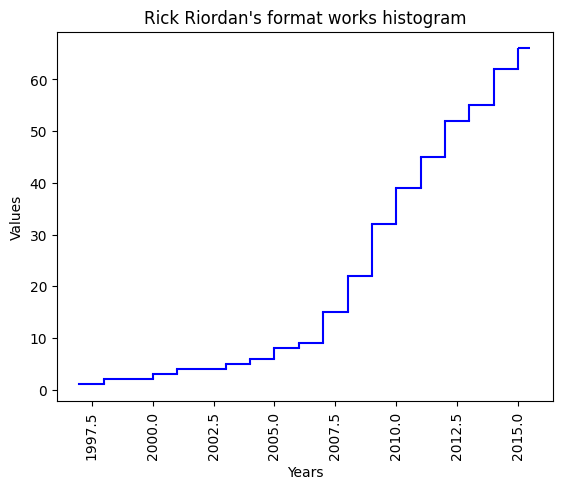

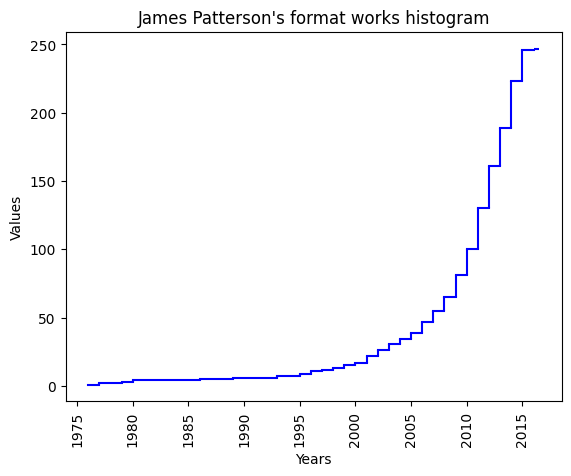

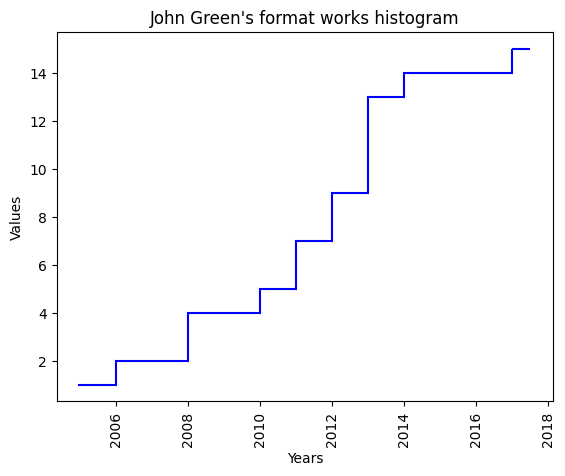

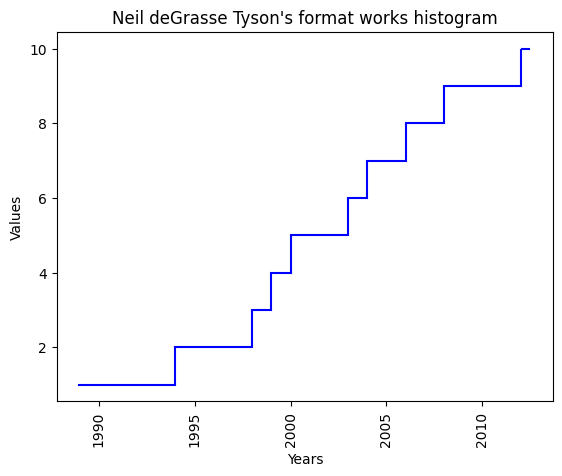

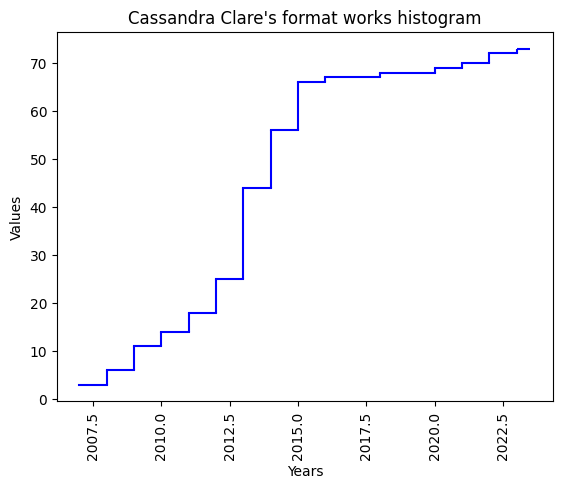

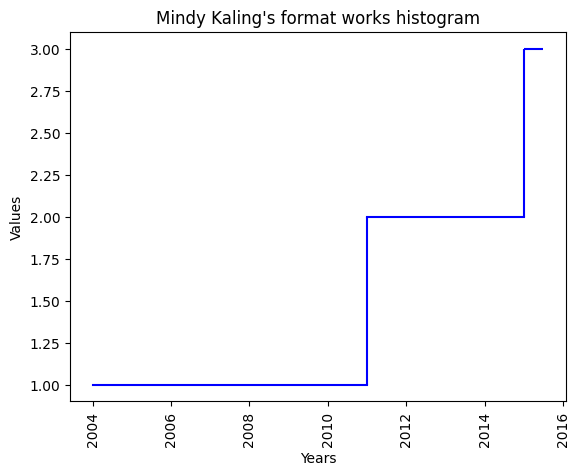

In [ ]:
for i in most_influent_authors:
    row = df_6.loc[df_6['author_id'] == most_influent_authors[i]]
    vv = row['opd_column_formatted'].values
    app = Counter(vv)
    count = 0
    
    # print(f"{i} ha: {app}")

    cat = sorted(app.keys())
    val = app.values()
    cumulative_hist = []
    i_esimo = 0
    
    for year in cat:
        i_esimo += app[year]
        cumulative_hist.append(i_esimo)
            
        
    # print(cat, cumulative_hist)
    # plt.bar(cat, cumulative_hist)
    
    for j in range(len(cumulative_hist) - 1):
        plt.plot([cat[j], cat[j + 1]], [cumulative_hist[j], cumulative_hist[j]], color='b', linestyle='-')

    plt.hlines(cumulative_hist[-1], cat[-1], cat[-1] + 0.5, colors='b', linestyles='-')

    # add labels
    plt.xlabel("Years")
    plt.ylabel("Books published")
    plt.title(f"{i}'s cumulative distribution of works")
    plt.xticks(rotation = 90)
    for j in range(1, len(cumulative_hist)):
        plt.vlines(cat[j], cumulative_hist[j-1], cumulative_hist[j], colors='b', linestyles='-')

    # show the plot
    plt.show()
    

We have chosen to represent the cumulative distribution of published books using the ECDF (Empirical Cumulative Distribution Function) without normalization. This approach allows us to visualize the publication distribution up to a specific year more effectively.


It seems that all these authors are roughly contemporary with each other. Some, like Stephen King, have had long careers spanning from 1960 to the present day, while others, such as Bill Gates, have only published a few books. Their book production appears to be more consistent during the first two decades of the 2000s.

                                                                          BONUS POINTS
***1.***
Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. 

Do the same using Pandas and compare performance in terms of milliseconds.

In [ ]:
import dask.dataframe as dd
import time

start_time = time.time()

file_path = "./lighter_authors.json"

# Read the JSON file into a Dask DataFrame
df_9 = dd.read_json(file_path)

# Filter authors with at least 100 reviews
result = df_9[df_9['text_reviews_count'] >= 100]
end_time = time.time()

# Print the result and the time taken in milliseconds
result
print(f"Time taken using Dask: {(end_time - start_time) * 1000} ms")


Time taken using Dask: 32262.18819618225 ms


In [ ]:
start_time = time.time()

file_path = "./lighter_authors.json"

# Read the JSON file into a Dask DataFrame
df_9 = pd.read_json(file_path, lines = True)

# Filter authors with at least 100 reviews
result = df_9[df_9['text_reviews_count'] >= 100]
end_time = time.time()

# Print the result and the time taken in milliseconds
result
print(f"Time taken using Pandas: {(end_time - start_time) * 1000} ms")

Time taken using Dask: 13582.310676574707 ms


Uploading file "lighter_authors" and filtering authors with more than 100 reviews lasts about one half using Pandas instead of Dask, **32262 ms** against **13582 ms**.
So for this kind of operations is more convenient using the first library.

***2*** Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload books.json, and join them with authors.json based on author_id. How many books don’t have a match for the author?

In [ ]:
##### DO NOT RUN ####
file_path_1 = "./lighter_authors.json"
file_path_2 = "./lighter_books.json"

# Read the "books.json" and "authors.json" datasets into Dask DataFrames
books_df = dd.read_json(file_path_2)
authors_df = dd.read_json(file_path_1)

# Perform the inner join on 'author_id'
joined_df = dd.merge(books_df, authors_df, on='author_id', how='inner')

# Find the number of books without a matching author
books_without_author = len(books_df) - len(joined_df)
print(f"Number of books without a matching author: {books_without_author.compute()}")
